In [174]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [65]:
path = r'C:\Users\e707088\Downloads'
file_name = 'Customer Sentiment Data.csv'
data = os.path.join(path, file_name)
df = pd.read_csv(data)


C:\Users\e707088\AppData\Local\Temp\ipykernel_35956\2903414231.py:4: DtypeWarning: Columns (13,15,16,18,32,34,36,37,41,45,46,55,71,83,84,86,87,90,91,92,96,98,100,101,103,104,105,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [66]:
df.head()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,...,GAS1PX1,GAS1PX2,GAS1,PINC,PINC2,PJOB,PSSA,PCRY,PSTK,WT
0,1,197801,19781,1978,1,,,76.71,116.23,51.32,...,,,,,,,,,,0.00
1,2,197801,19781,1978,2,,,121.12,154.08,99.94,...,,,,,,,,,,0.72
2,3,197801,19781,1978,3,,,2.70,2.70,2.70,...,,,,,,,,,,1.03
3,4,197801,19781,1978,4,,,76.71,154.08,27.01,...,,,,,,,,,,0.00
4,5,197801,19781,1978,5,,,121.12,116.23,124.25,...,,,,,,,,,,0.93


In [67]:
df_data = df.rename(columns={
'CASEID':'CASE IDENTIFICATION NUMBER',
'YYYY':'SURVEY YEAR',
'ID':'INTERVIEW ID',
'ICS':'INDEX OF CONSUMER SENTIMENT',
'ICC':'INDEX OF CURRENT ECONOMIC CONDITIONS',
'ICE':'INDEX OF CONSUMER EXPECTATIONS',
'PAGO':'PERSONAL FINANCES B/W YEAR AGO',
'PAGO5':'PERSONAL FINANCES B/W 5 YEAR AGO',
'PEXP':'PERSONAL FINANCES B/W NEXT YEAR',
'PEXP5':'PERSONAL FINANCES B/W IN 5YRS',
'BAGO':'ECONOMY BETTER/WORSE YEAR AGO',
'BEXP':'ECONOMY BETTER/WORSE NEXT YEAR',
'UNEMP':'UNEMPLOYMENT MORE/LESS NEXT YEAR',
'GOVT':'GOVERNMENT ECONOMIC POLICY',
'RATEX':'INTEREST RATES UP/DOWN NEXT YEAR',
'PX1Q1':'PRICES UP/DOWN NEXT YEAR',
'DUR':'DURABLES BUYING ATTITUDES',
'HOM':'HOME BUYING ATTITUDES',
'SHOM':'G/B SELL HOUSE',
'CAR':'VEHICLE BUYING ATTITUDES',
'INCOME':'TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS',
'HOMEOWN':'OWN/RENT HOME',
'HOMEVAL':'HOME VALUE UP/DOWN',
'AGE':'AGE OF RESPONDENT',
'REGION':'REGION OF RESIDENCE',
'SEX':'SEX OF RESPONDENT',
'MARRY':'MARITAL STATUS OF RESPONDENT',
'EDUC':'EDUCATION OF RESPONDENT',
'ECLGRD':'EDUCATION: COLLEGE GRADUATE',
'POLAFF':'POLITICAL AFFILIATION'})

In [68]:
df2 = df_data.filter(['CASE IDENTIFICATION NUMBER','SURVEY YEAR','INTERVIEW ID','INDEX OF CONSUMER SENTIMENT','INDEX OF CURRENT ECONOMIC CONDITIONS','INDEX OF CONSUMER EXPECTATIONS','PERSONAL FINANCES B/W YEAR AGO',
                      'PERSONAL FINANCES B/W 5 YEAR AGO','PERSONAL FINANCES B/W NEXT YEAR','PERSONAL FINANCES B/W IN 5YRS','ECONOMY BETTER/WORSE YEAR AGO','ECONOMY BETTER/WORSE NEXT YEAR','UNEMPLOYMENT MORE/LESS NEXT YEAR',
                      'GOVERNMENT ECONOMIC POLICY','INTEREST RATES UP/DOWN NEXT YEAR','PRICES UP/DOWN NEXT YEAR','DURABLES BUYING ATTITUDES','HOME BUYING ATTITUDES','G/B SELL HOUSE','VEHICLE BUYING ATTITUDES','TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS',
                      'OWN/RENT HOME','HOME VALUE UP/DOWN','AGE OF RESPONDENT','REGION OF RESIDENCE','SEX OF RESPONDENT','MARITAL STATUS OF RESPONDENT','EDUCATION OF RESPONDENT','EDUCATION: COLLEGE GRADUATE','POLITICAL AFFILIATION'])

In [69]:
len(df2.columns)

30

In [70]:
df2.isnull().values.any()

False

In [71]:
df2.dtypes

CASE IDENTIFICATION NUMBER                    int64
SURVEY YEAR                                   int64
INTERVIEW ID                                  int64
INDEX OF CONSUMER SENTIMENT                 float64
INDEX OF CURRENT ECONOMIC CONDITIONS        float64
INDEX OF CONSUMER EXPECTATIONS              float64
PERSONAL FINANCES B/W YEAR AGO                int64
PERSONAL FINANCES B/W 5 YEAR AGO             object
PERSONAL FINANCES B/W NEXT YEAR               int64
PERSONAL FINANCES B/W IN 5YRS                object
ECONOMY BETTER/WORSE YEAR AGO                 int64
ECONOMY BETTER/WORSE NEXT YEAR                int64
UNEMPLOYMENT MORE/LESS NEXT YEAR              int64
GOVERNMENT ECONOMIC POLICY                    int64
INTEREST RATES UP/DOWN NEXT YEAR              int64
PRICES UP/DOWN NEXT YEAR                      int64
DURABLES BUYING ATTITUDES                     int64
HOME BUYING ATTITUDES                         int64
G/B SELL HOUSE                               object
VEHICLE BUYI

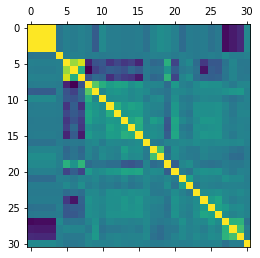

In [72]:
plt.matshow(df.corr())
plt.show()

In [159]:
df_corr = df2.drop(['CASE IDENTIFICATION NUMBER', 'SURVEY YEAR', 'INTERVIEW ID'], axis=1)

corr = df_corr.corr()

In [160]:
corr.style.background_gradient(cmap='coolwarm')

,INDEX OF CONSUMER SENTIMENT,INDEX OF CURRENT ECONOMIC CONDITIONS,INDEX OF CONSUMER EXPECTATIONS,PERSONAL FINANCES B/W YEAR AGO,PERSONAL FINANCES B/W NEXT YEAR,ECONOMY BETTER/WORSE YEAR AGO,ECONOMY BETTER/WORSE NEXT YEAR,UNEMPLOYMENT MORE/LESS NEXT YEAR,GOVERNMENT ECONOMIC POLICY,INTEREST RATES UP/DOWN NEXT YEAR,PRICES UP/DOWN NEXT YEAR,DURABLES BUYING ATTITUDES,HOME BUYING ATTITUDES,VEHICLE BUYING ATTITUDES
INDEX OF CONSUMER SENTIMENT,1.000000,0.737843,0.887851,-0.580157,-0.476560,-0.461268,-0.415927,0.360062,-0.387231,0.008215,0.084129,-0.455548,-0.263190,-0.265112
INDEX OF CURRENT ECONOMIC CONDITIONS,0.737843,1.000000,0.344518,-0.747411,-0.223469,-0.303960,-0.159740,0.152321,-0.226572,-0.040149,0.002924,-0.651478,-0.228333,-0.257334
INDEX OF CONSUMER EXPECTATIONS,0.887851,0.344518,1.000000,-0.297397,-0.510480,-0.434341,-0.469593,0.396950,-0.384121,0.038795,0.115017,-0.189479,-0.210399,-0.193303
PERSONAL FINANCES B/W YEAR AGO,-0.580157,-0.747411,-0.297397,1.000000,0.227587,0.260824,0.129970,-0.127426,0.197407,0.020981,-0.015517,0.140853,0.122423,0.119894
PERSONAL FINANCES B/W NEXT YEAR,-0.476560,-0.223469,-0.510480,0.227587,1.000000,0.188294,0.261941,-0.116679,0.179748,0.021715,-0.015937,0.123286,0.126275,0.134759
ECONOMY BETTER/WORSE YEAR AGO,-0.461268,-0.303960,-0.434341,0.260824,0.188294,1.000000,0.272512,-0.259174,0.280372,0.070748,0.002799,0.179685,0.172886,0.151296
ECONOMY BETTER/WORSE NEXT YEAR,-0.415927,-0.159740,-0.469593,0.129970,0.261941,0.272512,1.000000,-0.287947,0.268097,-0.031538,-0.069475,0.120619,0.138290,0.146830
UNEMPLOYMENT MORE/LESS NEXT YEAR,0.360062,0.152321,0.396950,-0.127426,-0.116679,-0.259174,-0.287947,1.000000,-0.219509,0.052635,0.110943,-0.066916,-0.085319,-0.069635
GOVERNMENT ECONOMIC POLICY,-0.387231,-0.226572,-0.384121,0.197407,0.179748,0.280372,0.268097,-0.219509,1.000000,-0.013598,-0.072857,0.141221,0.131899,0.139988
INTEREST RATES UP/DOWN NEXT YEAR,0.008215,-0.040149,0.038795,0.020981,0.021715,0.070748,-0.031538,0.052635,-0.013598,1.000000,0.232152,0.062518,0.046670,0.031820


In [161]:
df_corr.dtypes

INDEX OF CONSUMER SENTIMENT                 float64
INDEX OF CURRENT ECONOMIC CONDITIONS        float64
INDEX OF CONSUMER EXPECTATIONS              float64
PERSONAL FINANCES B/W YEAR AGO                int64
PERSONAL FINANCES B/W 5 YEAR AGO             object
PERSONAL FINANCES B/W NEXT YEAR               int64
PERSONAL FINANCES B/W IN 5YRS                object
ECONOMY BETTER/WORSE YEAR AGO                 int64
ECONOMY BETTER/WORSE NEXT YEAR                int64
UNEMPLOYMENT MORE/LESS NEXT YEAR              int64
GOVERNMENT ECONOMIC POLICY                    int64
INTEREST RATES UP/DOWN NEXT YEAR              int64
PRICES UP/DOWN NEXT YEAR                      int64
DURABLES BUYING ATTITUDES                     int64
HOME BUYING ATTITUDES                         int64
G/B SELL HOUSE                               object
VEHICLE BUYING ATTITUDES                      int64
TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS     object
OWN/RENT HOME                                object
HOME VALUE U

In [76]:
df_corr.corr().abs()
s = df_corr.corr().abs().unstack()

In [77]:
s.sort_values(kind='quicksort')

PRICES UP/DOWN NEXT YEAR              VEHICLE BUYING ATTITUDES                0.001806
VEHICLE BUYING ATTITUDES              PRICES UP/DOWN NEXT YEAR                0.001806
ECONOMY BETTER/WORSE YEAR AGO         PRICES UP/DOWN NEXT YEAR                0.002799
PRICES UP/DOWN NEXT YEAR              ECONOMY BETTER/WORSE YEAR AGO           0.002799
INDEX OF CURRENT ECONOMIC CONDITIONS  PRICES UP/DOWN NEXT YEAR                0.002924
                                                                                ...   
PERSONAL FINANCES B/W YEAR AGO        PERSONAL FINANCES B/W YEAR AGO          1.000000
INDEX OF CONSUMER EXPECTATIONS        INDEX OF CONSUMER EXPECTATIONS          1.000000
INDEX OF CURRENT ECONOMIC CONDITIONS  INDEX OF CURRENT ECONOMIC CONDITIONS    1.000000
HOME BUYING ATTITUDES                 HOME BUYING ATTITUDES                   1.000000
VEHICLE BUYING ATTITUDES              VEHICLE BUYING ATTITUDES                1.000000
Length: 196, dtype: float64

In [162]:
pd.isna(df_corr['AGE OF RESPONDENT'])

0         False
1         False
2         False
3         False
4         False
          ...  
310319    False
310320    False
310321    False
310322    False
310323    False
Name: AGE OF RESPONDENT, Length: 310324, dtype: bool

In [92]:
np.where(pd.isnull(df_corr))

(array([], dtype=int64), array([], dtype=int64))

In [163]:
len(df_corr[df_corr['AGE OF RESPONDENT'] == '  '])

2373

In [164]:
len(df_corr)

310324

In [165]:
df_corr = df_corr[df_corr['AGE OF RESPONDENT'] != '  ']
df_corr = df_corr[df_corr['TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS'] != '      ']

In [166]:
len(df_corr[df_corr['TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS'] == '      '])

0

In [167]:
df_corr = df_corr.astype({'AGE OF RESPONDENT':'int'})


In [168]:
df_corr = df_corr.astype({'TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS':'int'})

In [179]:
df_corr['TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS']

1

<AxesSubplot:xlabel='bin', ylabel='TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS'>

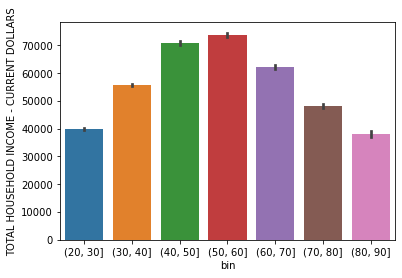

In [186]:
df_corr['bin'] = pd.cut(df_corr['AGE OF RESPONDENT'], bins=range(20,100,10)) #, labels=[f'{l}-{l+9}' for l in range(20,100,9)]

#fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='bin', y='TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS', data=df_corr)


<AxesSubplot:xlabel='AGE OF RESPONDENT', ylabel='TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS'>

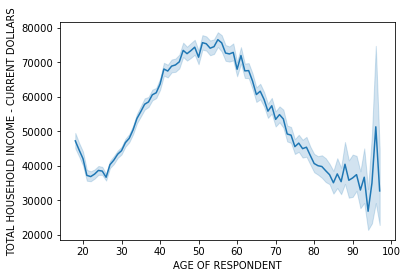

In [188]:
sns.lineplot(x='AGE OF RESPONDENT', y='TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS', data=df_corr)